In [53]:
from google.oauth2 import service_account
from google.cloud import bigquery
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

credentials = service_account.Credentials.from_service_account_file('bigquery_key.json')
fuse_project_id = 'kohls-merch-in-lle'
client = bigquery.Client(credentials= credentials,project=fuse_project_id)

In [2]:
#query_job = client.query("""select * from FUSE_LOCAL_TEST.TLOG_MODEL_TRAINING_SET""")
#results = query_job.result().to_dataframe()  

In [2]:
import pandas as pd
#results.to_csv("trainingdata.csv",index=False)
results = pd.read_csv("trainingdata.csv",index_col=None)

In [4]:
print(results.head())
print(np.unique(results[['dept_nbr']]['dept_nbr']))
print(len(np.unique(results[['dept_nbr']]['dept_nbr'])))

   dept_nbr  class_nbr  subclass_nbr                     channel  sold_qty  \
0       925         70            77  UNKNOWN FULFILLMENT METHOD         0   
1       925         70            77  UNKNOWN FULFILLMENT METHOD         0   
2       925         70            77  UNKNOWN FULFILLMENT METHOD         1   
3       925         70            77  UNKNOWN FULFILLMENT METHOD         6   
4       925         70            77  UNKNOWN FULFILLMENT METHOD        14   

   class_qty    dept_qty  avg_sale_discount  avg_total_discount    avg_age  \
0   3.592593   57.074074           1.074101            0.674121  17.264547   
1   3.592593   57.074074           1.074101            0.674121  17.264547   
2   1.000000   41.000000           1.000000            0.670477  16.957730   
3   6.000000   94.000000           0.949988            0.675820  17.084605   
4  17.000000  171.000000           0.949987            0.636985  17.144575   

   fraction_status00  fraction_status20  fraction_status30  fr

Text(0.5, 1.0, '# data points for every bow_date')

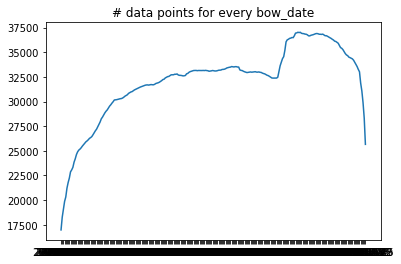

In [5]:
from pandas.plotting import register_matplotlib_converters
register = register_matplotlib_converters()
plt.plot(results['bow_date'].value_counts().sort_index())
plt.title('# data points for every bow_date')

Text(0.5, 1.0, 'dept_class_subclass_wise_sold_qty')

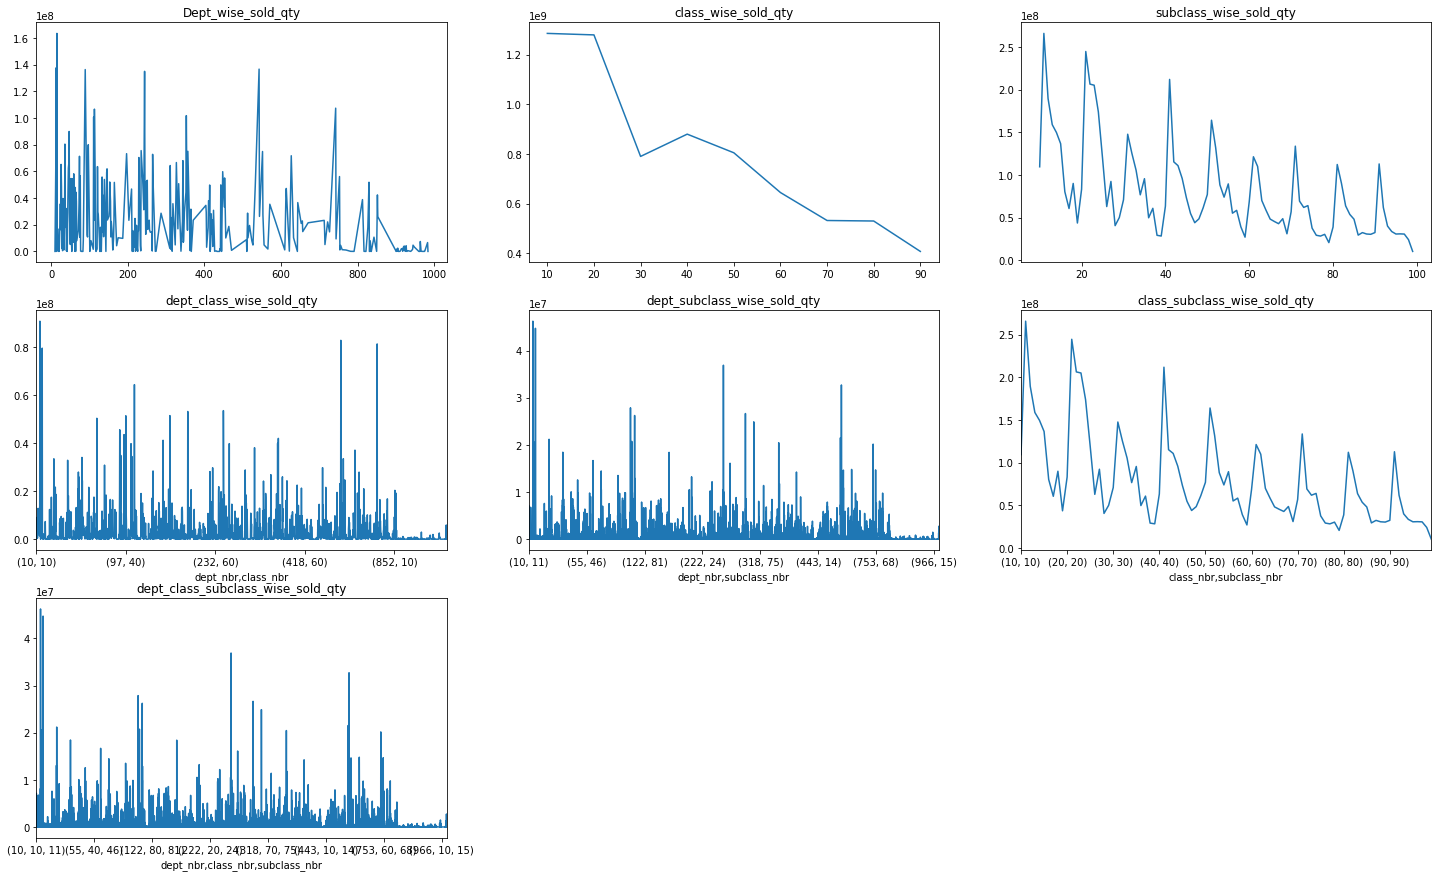

In [6]:
import matplotlib.pylab as plt
fig = plt.figure(figsize=(25,15))
gs = fig.add_gridspec(3, 3)

ax = fig.add_subplot(gs[0, 0])
dept_grouped_data = results.groupby(['dept_nbr'])["sold_qty"].apply(lambda x : x.astype(int).sum())
plt.plot(dept_grouped_data)
plt.title('Dept_wise_sold_qty')

ax = fig.add_subplot(gs[0, 1])
class_grouped_data = results.groupby(['class_nbr'])["sold_qty"].apply(lambda x : x.astype(int).sum())
plt.plot(class_grouped_data)
plt.title('class_wise_sold_qty')

ax = fig.add_subplot(gs[0, 2])
subclass_grouped_data = results.groupby(['subclass_nbr'])["sold_qty"].apply(lambda x : x.astype(int).sum())
plt.plot(subclass_grouped_data)
plt.title('subclass_wise_sold_qty')

ax = fig.add_subplot(gs[1, 0])
dept_class_grouped_data = results.groupby(['dept_nbr','class_nbr'])["sold_qty"].apply(lambda x : x.astype(int).sum())
dept_class_grouped_data.plot()
plt.title('dept_class_wise_sold_qty')

ax = fig.add_subplot(gs[1, 1])
dept_subclass_grouped_data = results.groupby(['dept_nbr','subclass_nbr'])["sold_qty"].apply(lambda x : x.astype(int).sum())
dept_subclass_grouped_data.plot()
plt.title('dept_subclass_wise_sold_qty')

ax = fig.add_subplot(gs[1, 2])
class_subclass_grouped_data = results.groupby(['class_nbr','subclass_nbr'])["sold_qty"].apply(lambda x : x.astype(int).sum())
class_subclass_grouped_data.plot()
plt.title('class_subclass_wise_sold_qty')

ax = fig.add_subplot(gs[2, 0])
dept_class_subclass_grouped_data = results.groupby(['dept_nbr', 'class_nbr','subclass_nbr'])["sold_qty"].apply(lambda x : x.astype(int).sum())
dept_class_subclass_grouped_data.plot()
plt.title('dept_class_subclass_wise_sold_qty')




Text(0.5, 1.0, 'dept_class_subclass_wise_sold_qty')

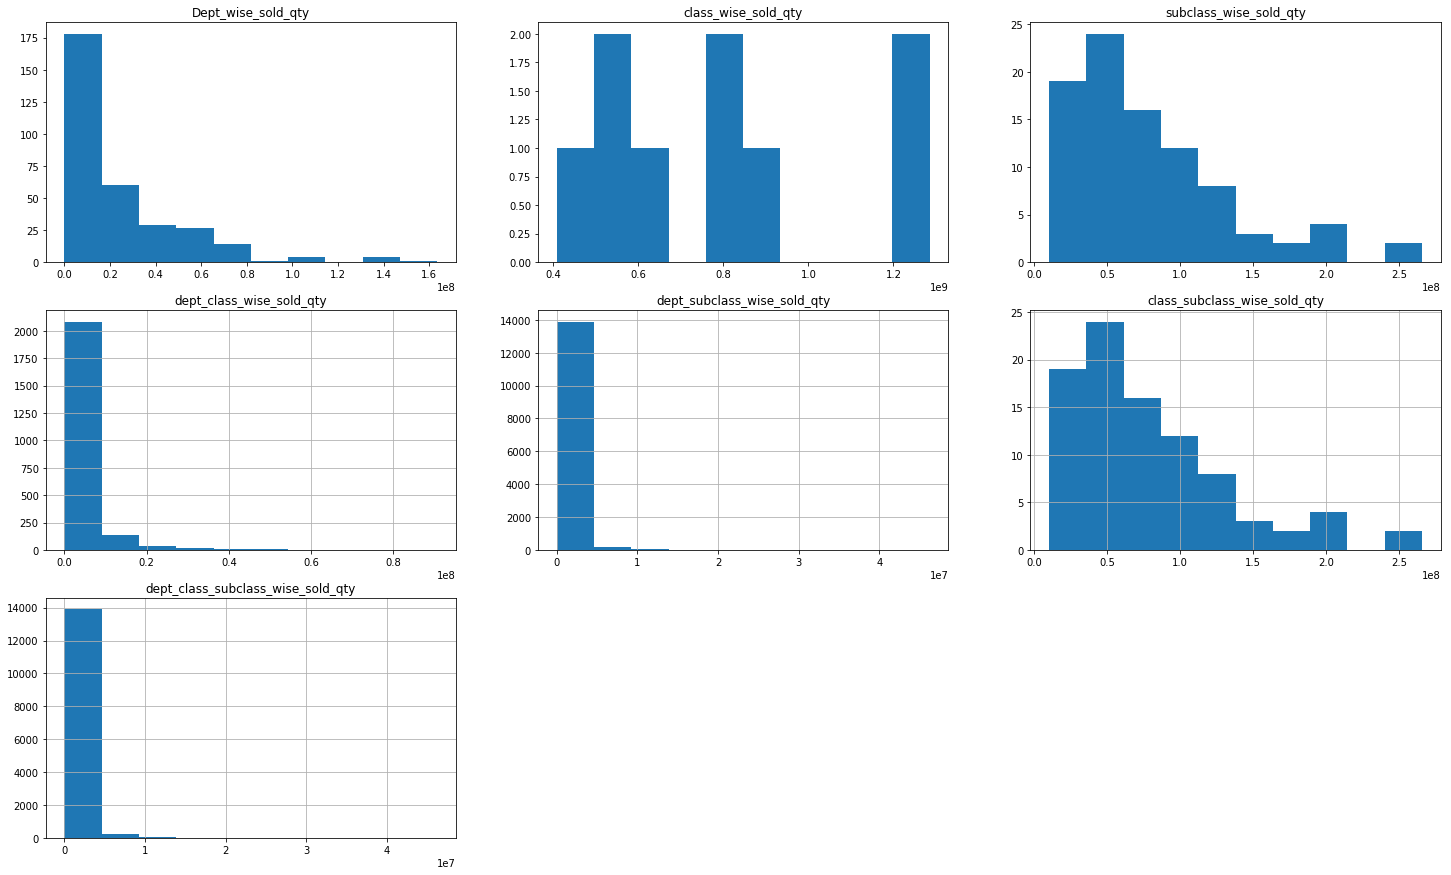

In [7]:
fig1 = plt.figure(figsize=(25,15))
gs1 = fig1.add_gridspec(3, 3)

ax1 = fig1.add_subplot(gs1[0, 0])
plt.hist(dept_grouped_data)
plt.title('Dept_wise_sold_qty')


ax1 = fig1.add_subplot(gs1[0, 1])
plt.hist(class_grouped_data)
plt.title('class_wise_sold_qty')

ax1 = fig1.add_subplot(gs1[0, 2])
plt.hist(subclass_grouped_data)
plt.title('subclass_wise_sold_qty')

ax1 = fig1.add_subplot(gs1[1, 0])
dept_class_grouped_data.hist()
plt.title('dept_class_wise_sold_qty')

ax1 = fig1.add_subplot(gs1[1, 1])
dept_subclass_grouped_data.hist()
plt.title('dept_subclass_wise_sold_qty')

ax1 = fig1.add_subplot(gs1[1, 2])
class_subclass_grouped_data.hist()
plt.title('class_subclass_wise_sold_qty')

ax1 = fig1.add_subplot(gs1[2, 0])
dept_class_subclass_grouped_data.hist()
plt.title('dept_class_subclass_wise_sold_qty')



/usr/local/lib/python3.5/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.5/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Number of rows in the original data are :8277688
Number of columns in the original data are :15
Overall values with dept_qty are :332013921717.3891
Values with dept_qty <= 50000 are :47600101109.396
Values with dept_qty <= 50000 are (%) :14.336778669755091
Week Count with dept_qty <= 50000 are (%) :79.43960922421816
Values with dept_qty > 50000 are :284413820607.9928
Values with dept_qty > 50000 are (%):85.66322133024482
Week Count with dept_qty > 50000 are (%):20.560390775781837
Overall values with class_qty are :52563554480.645706
Values with class_qty <= 50000 are :27215448870.26747
Values with class_qty <= 50000 are (%):51.77627186587696
Week count with class_qty <= 50000 are (%):97.0849952305523
Values with class_qty > 50000 are :25348105610.37827
Values with class_qty > 50000 are (%):48.22372813412311
Week count with class_qty > 50000 are (%):2.915004769447701
Week # with Negative avg_sale_discount are (%):3


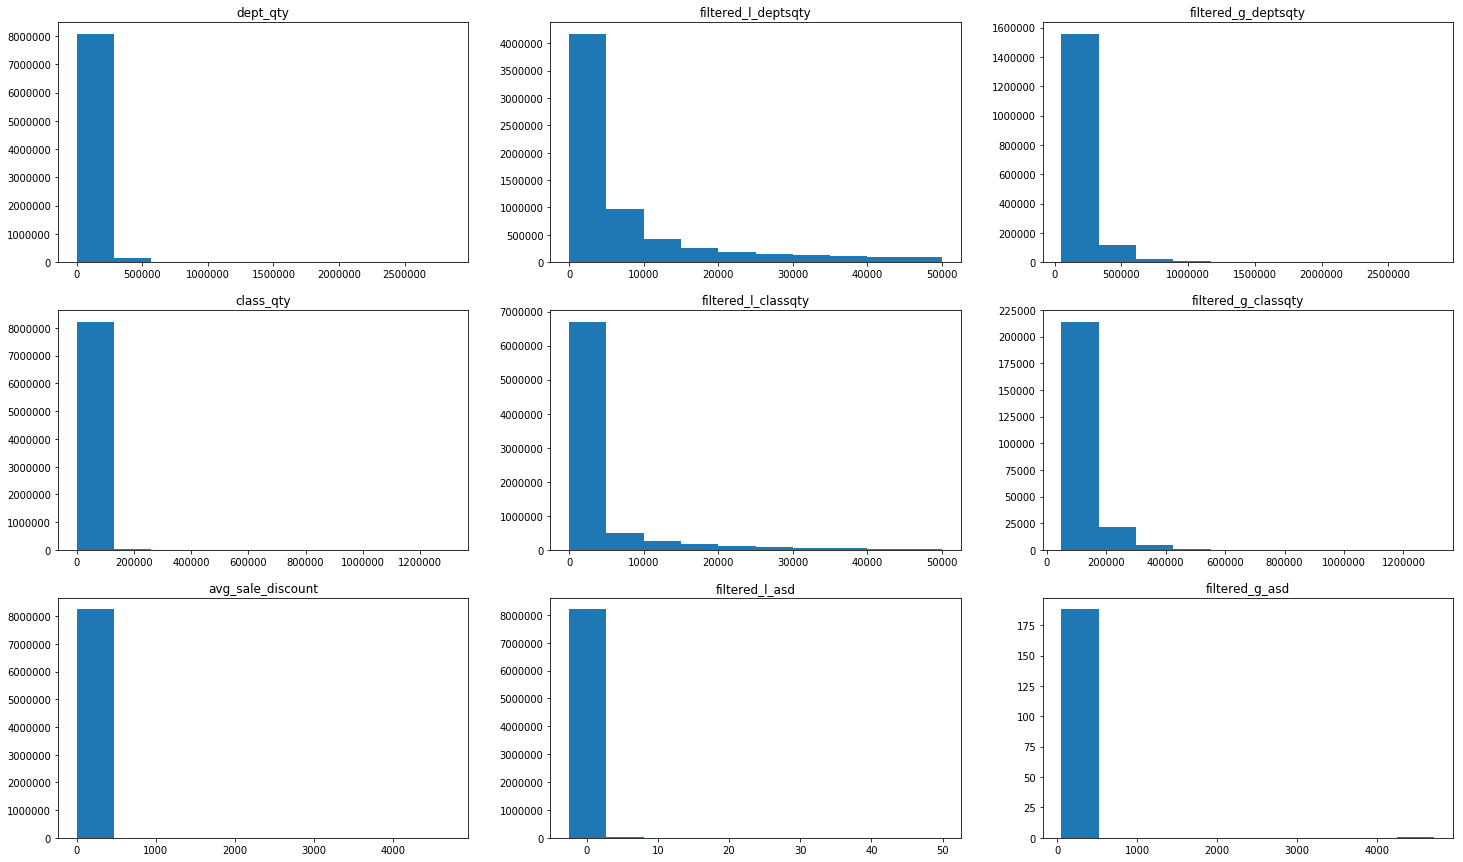

In [8]:
fig = plt.figure(figsize=(25,15))
gs = fig.add_gridspec(3, 3)

deptqty = results[['dept_qty']].astype(float)
filtered_g_deptqty = deptqty[(deptqty > 50000)['dept_qty']]
filtered_l_deptqty = deptqty[(deptqty <= 50000)['dept_qty']]

ax = fig.add_subplot(gs[0, 0])
plt.hist(deptqty['dept_qty'])
plt.title('dept_qty')

ax = fig.add_subplot(gs[0, 1])
plt.hist(filtered_l_deptqty['dept_qty'])
plt.title('filtered_l_deptsqty')

ax = fig.add_subplot(gs[0, 2])
plt.hist(filtered_g_deptqty['dept_qty'])
plt.title('filtered_g_deptsqty')

classqty = results[['class_qty']].astype(float)
filtered_g_classqty = classqty[(classqty > 50000)['class_qty']]
filtered_l_classqty = classqty[(classqty <= 50000)['class_qty']]

ax = fig.add_subplot(gs[1, 0])
plt.hist(classqty['class_qty'])
plt.title('class_qty')

ax = fig.add_subplot(gs[1, 1])
plt.hist(filtered_l_classqty['class_qty'])
plt.title('filtered_l_classqty')

ax = fig.add_subplot(gs[1, 2])
plt.hist(filtered_g_classqty['class_qty'])
plt.title('filtered_g_classqty')


asd = results[['avg_sale_discount']]
filtered_l_asd = asd[(asd <= 50)['avg_sale_discount']]
filtered_g_asd = asd[(asd > 50)['avg_sale_discount']]

ax = fig.add_subplot(gs[2, 0])
plt.hist(asd['avg_sale_discount'])
plt.title('avg_sale_discount')

ax = fig.add_subplot(gs[2, 1])
plt.hist(filtered_l_asd['avg_sale_discount'])
plt.title('filtered_l_asd')

ax = fig.add_subplot(gs[2, 2])
plt.hist(filtered_g_asd['avg_sale_discount'])
plt.title('filtered_g_asd')


print('Number of rows in the original data are :' + str(results.shape[0]))
print('Number of columns in the original data are :' + str(results.shape[1]))
print('Overall values with dept_qty are :' + str((deptqty['dept_qty']).sum()))
print('Values with dept_qty <= 50000 are :' + str((filtered_l_deptqty['dept_qty']).sum()))
print('Values with dept_qty <= 50000 are (%) :' + str((filtered_l_deptqty['dept_qty']).sum()*100 / (deptqty['dept_qty']).sum()))
print('Week Count with dept_qty <= 50000 are (%) :' + str((filtered_l_deptqty['dept_qty']).count()*100 / (deptqty['dept_qty']).count()))
print('Values with dept_qty > 50000 are :' + str((filtered_g_deptqty['dept_qty']).sum()))
print('Values with dept_qty > 50000 are (%):' + str((filtered_g_deptqty['dept_qty']).sum() *100/ (deptqty['dept_qty']).sum()))
print('Week Count with dept_qty > 50000 are (%):' + str((filtered_g_deptqty['dept_qty']).count() *100/ (deptqty['dept_qty']).count()))

print('Overall values with class_qty are :' + str((classqty['class_qty']).sum()))
print('Values with class_qty <= 50000 are :' + str((filtered_l_classqty['class_qty']).sum()))
print('Values with class_qty <= 50000 are (%):' + str((filtered_l_classqty['class_qty']).sum()*100/(classqty['class_qty']).sum()))
print('Week count with class_qty <= 50000 are (%):' + str((filtered_l_classqty['class_qty']).count()*100/(classqty['class_qty']).count()))
print('Values with class_qty > 50000 are :' + str((filtered_g_classqty['class_qty']).sum()))
print('Values with class_qty > 50000 are (%):' + str((filtered_g_classqty['class_qty']).sum()*100/(classqty['class_qty']).sum()))
print('Week count with class_qty > 50000 are (%):' + str((filtered_g_classqty['class_qty']).count()*100/(classqty['class_qty']).count()))
print('Week # with Negative avg_sale_discount are (%):' + str((asd < 0)['avg_sale_discount'].sum()))



In [9]:
print("DType for class_qty, dept_qty and sold_qty clumuns are Object and it should be Int64 or float." + 
      "These columns have some float values as well because of averaging so we need to convert Dtype " + 
      "object to float, otherwise DL algorithms would think it as string or object and that would vary results")

DType for class_qty, dept_qty and sold_qty clumuns are Object and it should be Int64 or float.These columns have some float values as well because of averaging so we need to convert Dtype object to float, otherwise DL algorithms would think it as string or object and that would vary results


In [10]:
resultsn = results['bow_date'].astype(str)
bool1 = resultsn.str.match(pat = '(2015-09-20)')
filtereddata1 = results[bool1]

bool2 = resultsn.str.match(pat = '(2015-09-27)')
filtereddata2 = results[bool2]

bool3 = resultsn.str.match(pat = '(2015-10-25)')
filtereddata3 = results[bool3]

filtereddata = pd.concat([filtereddata1,filtereddata2,filtereddata3])

filtereddata.to_csv('filtered_data.csv',index=False)

Text(0.5, 1.0, 'sold_qty')

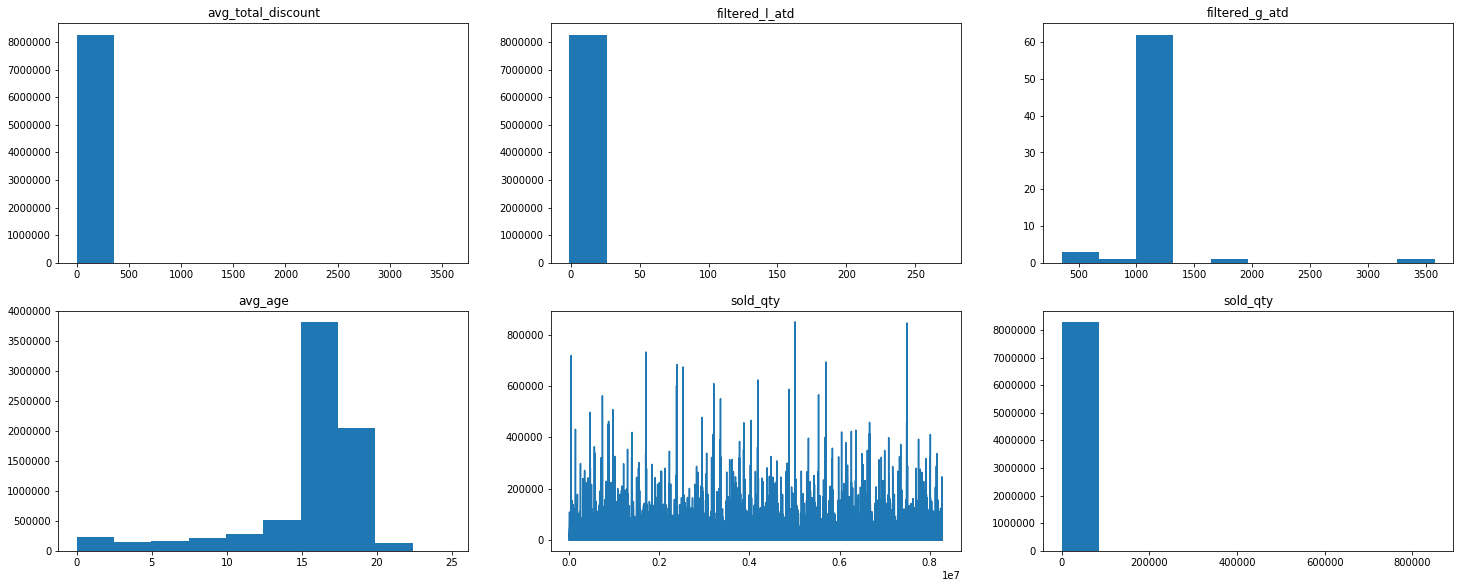

In [11]:
fig = plt.figure(figsize=(25,15))
gs = fig.add_gridspec(3, 3)

atd = results[['avg_total_discount']]
filtered_l_atd = atd[(atd <= 300)['avg_total_discount']]
filtered_g_atd = atd[(atd > 300)['avg_total_discount']]

ax = fig.add_subplot(gs[0, 0])
plt.hist(atd['avg_total_discount'])
plt.title('avg_total_discount')

ax = fig.add_subplot(gs[0, 1])
plt.hist(filtered_l_atd['avg_total_discount'])
plt.title('filtered_l_atd')

ax = fig.add_subplot(gs[0, 2])
plt.hist(filtered_g_atd['avg_total_discount'])
plt.title('filtered_g_atd')

aa = results[['avg_age']]

ax = fig.add_subplot(gs[1, 0])
plt.hist(aa['avg_age'])
plt.title('avg_age')

sq = results[['sold_qty']].astype(float)
ax = fig.add_subplot(gs[1, 1])
plt.plot(sq['sold_qty'])
plt.title('sold_qty')

ax = fig.add_subplot(gs[1, 2])
plt.hist(sq['sold_qty'])
plt.title('sold_qty')



In [40]:
udeptnbr = results[['dept_nbr']]['dept_nbr']
uclassnbr = results[['class_nbr']]['class_nbr']
usubclassnbr = results[['subclass_nbr']]['subclass_nbr']
uchannel = results[['channel']]['channel']

print(np.unique(udeptnbr))
print(np.unique(uclassnbr))
print(np.unique(usubclassnbr))
print(np.unique(uchannel))

print(len(np.unique(udeptnbr)))
print(len(np.unique(uclassnbr)))
print(len(np.unique(usubclassnbr)))
print(len(np.unique(uchannel)))


[ 10  11  12  13  14  15  16  17  19  20  21  23  24  25  26  27  28  29
  30  31  32  33  34  35  36  37  39  40  41  42  43  44  45  46  47  48
  49  50  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  71  73  74  75  76  77  78  79  80  83  84  89  94  95  96  97 101 104
 110 111 112 113 115 116 117 120 121 122 123 126 127 128 129 131 132 133
 134 135 137 139 143 144 145 146 147 151 152 153 155 156 157 159 161 163
 164 165 171 175 187 197 203 210 211 212 213 214 215 217 218 219 220 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 239 242 244 245 246
 247 248 251 252 253 254 256 257 259 263 264 265 266 272 274 287 310 311
 313 314 315 316 318 324 327 331 333 339 343 344 345 346 348 352 353 355
 356 357 363 364 365 366 371 404 405 406 410 411 412 413 414 415 416 418
 419 420 422 424 427 431 433 440 441 442 443 444 445 446 448 452 453 456
 457 464 471 510 511 513 514 518 524 527 533 543 544 552 553 556 566 571
 610 611 613 614 622 624 627 633 643 644 653 656 65

(-2.883877682210238, 0.047255181756598784, 3, 89, {'10%': -2.5844100201994697, '1%': -3.506057133647011, '5%': -2.8946066061911946}, 780.9105315671128)


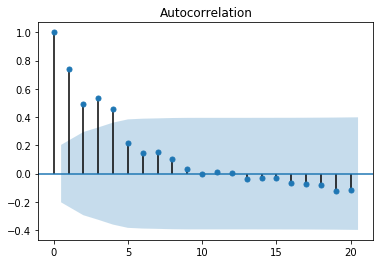

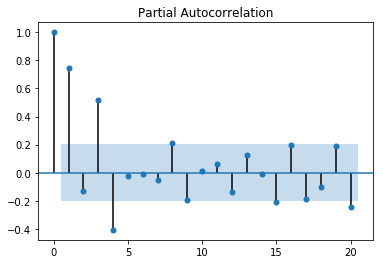

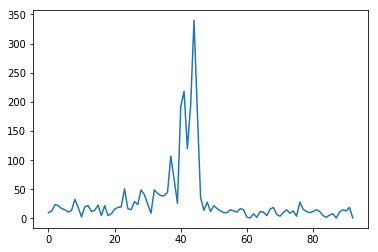

In [54]:
fdata = results.loc[(results[['dept_nbr']]['dept_nbr']==925),:]
fdata = fdata.loc[(fdata[['class_nbr']]['class_nbr']==30),:]
fdata = fdata.loc[(fdata[['subclass_nbr']]['subclass_nbr']==30),:]
fdata = fdata.loc[(fdata[['channel']]['channel']=='STHWEB'),:].sort_values('bow_date')
print(adfuller(fdata[['sold_qty']]['sold_qty'].values))
plot_acf(fdata[['sold_qty']]['sold_qty'])
plot_pacf(fdata[['sold_qty']]['sold_qty'])
fig = plt.figure()
plt.plot(fdata[['sold_qty']]['sold_qty'].values)

(-8.747351840058156, 2.898523207782216e-14, 0, 72, {'10%': -2.5886785262345677, '1%': -3.524624466842421, '5%': -2.9026070739026064}, 295.68496014911125)


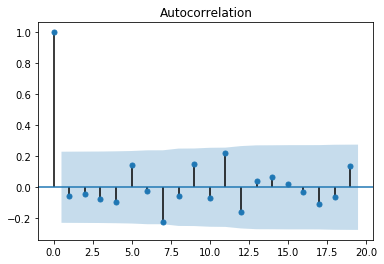

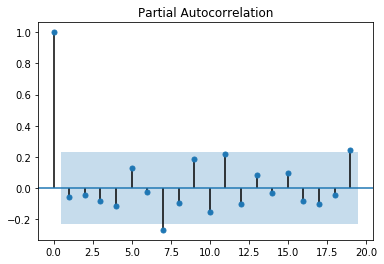

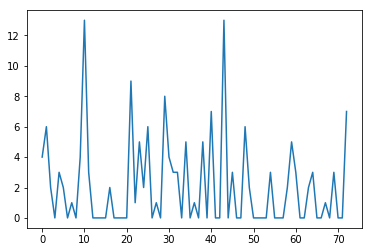

In [55]:
fdata = results.loc[(results[['dept_nbr']]['dept_nbr']==925),:]

fdata = fdata.loc[(fdata[['class_nbr']]['class_nbr']==70),:]
fdata = fdata.loc[(fdata[['subclass_nbr']]['subclass_nbr']==77),:]
fdata = fdata.loc[(fdata[['channel']]['channel']=='STHWEB'),:].sort_values('bow_date')

print(adfuller(fdata[['sold_qty']]['sold_qty'].values))
plot_acf(fdata[['sold_qty']]['sold_qty'])
plot_pacf(fdata[['sold_qty']]['sold_qty'])
fig = plt.figure()
plt.plot(fdata[['sold_qty']]['sold_qty'].values)

(-6.941518903710924, 1.0222130033787386e-09, 0, 189, {'10%': -2.574988319755886, '1%': -3.4654311561944873, '5%': -2.8769570530458792}, 2164.2686462680467)


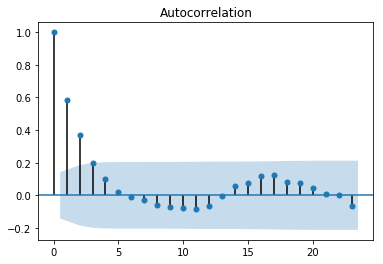

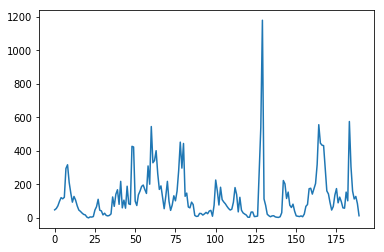

In [56]:
fdata = results.loc[(results[['dept_nbr']]['dept_nbr']==11),:]
fdata = fdata.loc[(fdata[['class_nbr']]['class_nbr']==10),:]
fdata = fdata.loc[(fdata[['subclass_nbr']]['subclass_nbr']==11),:]
fdata = fdata.loc[(fdata[['channel']]['channel']=='STHWEB'),:].sort_values('bow_date')

plot_acf(fdata[['sold_qty']]['sold_qty'])
plot_pacf(fdata[['sold_qty']]['sold_qty'])

fdata.to_csv('fdata.csv')
fig = plt.figure()
plt.plot(fdata[['sold_qty']]['sold_qty'].values)

(-3.1818817436988858, 0.02105768159652191, 5, 119, {'10%': -2.579896092790057, '1%': -3.4865346059036564, '5%': -2.8861509858476264}, 1043.071083715181)


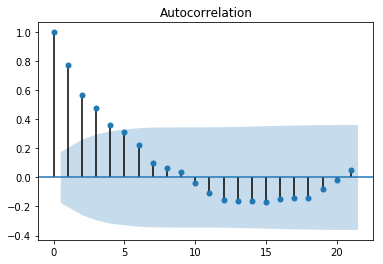

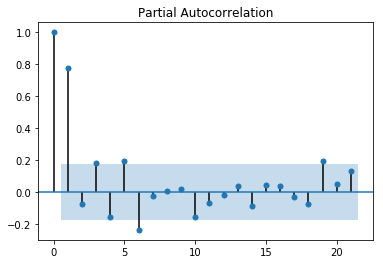

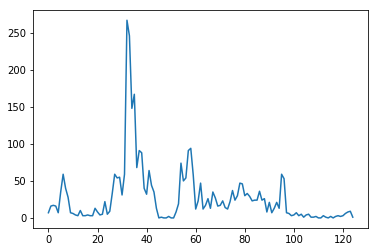

In [58]:
fdata = results.loc[(results[['dept_nbr']]['dept_nbr']==197),:]
fdata = fdata.loc[(fdata[['class_nbr']]['class_nbr']==10),:]
fdata = fdata.loc[(fdata[['subclass_nbr']]['subclass_nbr']==10),:]
fdata = fdata.loc[(fdata[['channel']]['channel']=='STHWEB'),:].sort_values('bow_date')

print(adfuller(fdata[['sold_qty']]['sold_qty'].values))
plot_acf(fdata[['sold_qty']]['sold_qty'])
plot_pacf(fdata[['sold_qty']]['sold_qty'])
fig = plt.figure()
plt.plot(fdata[['sold_qty']]['sold_qty'].values)

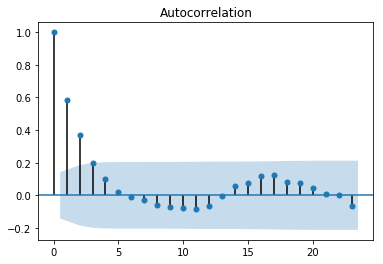

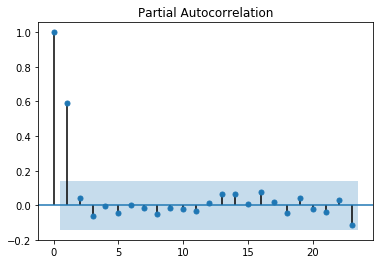

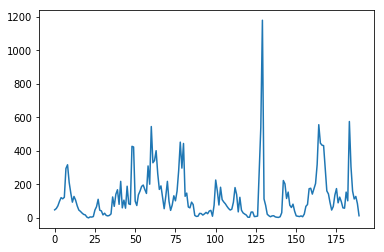

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

fdata = results.loc[(results[['dept_nbr']]['dept_nbr']==11),:]
fdata = fdata.loc[(fdata[['class_nbr']]['class_nbr']==10),:]
fdata = fdata.loc[(fdata[['subclass_nbr']]['subclass_nbr']==11),:]
fdata = fdata.loc[(fdata[['channel']]['channel']=='STHWEB'),:].sort_values('bow_date')

plot_acf(fdata[['sold_qty']]['sold_qty'])
plot_pacf(fdata[['sold_qty']]['sold_qty'])

fdata.to_csv('fdata.csv')
fig = plt.figure()
plt.plot(fdata[['sold_qty']]['sold_qty'].values)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  190
Model:                     ARMA(1, 0)   Log Likelihood               -1173.218
Method:                       css-mle   S.D. of innovations            116.138
Date:                Fri, 21 Feb 2020   AIC                           2352.436
Time:                        19:37:31   BIC                           2362.178
Sample:                             0   HQIC                          2356.382
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        124.7946     20.264      6.158      0.000      85.078     164.512
ar.L1.y        0.5872      0.058     10.045      0.000       0.473       0.702
                                    Roots           

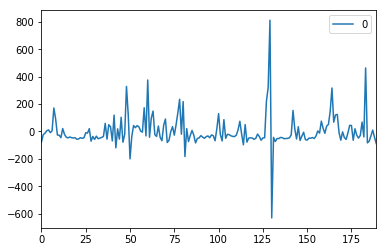

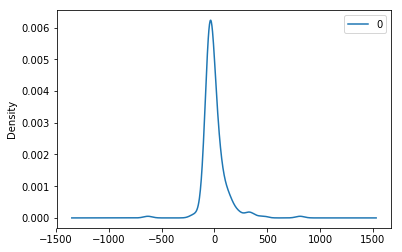

                0
count  190.000000
mean     0.236725
std    116.491066
min   -630.862774
25%    -49.176630
50%    -30.485181
75%     21.150780
max    811.555984


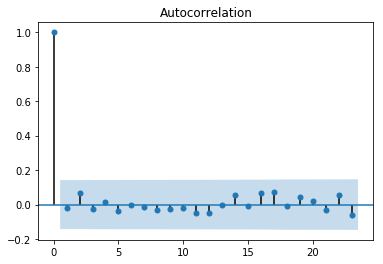

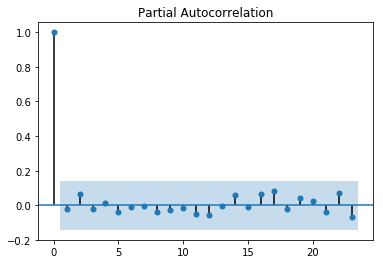

In [7]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
model = ARIMA(fdata[['sold_qty']]['sold_qty'].values, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
acfplot = plot_acf(residuals)
pacfplot = plot_pacf(residuals)

In [5]:
from google.oauth2 import service_account
from google.cloud import bigquery
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

#credentials = service_account.Credentials.from_service_account_file('bigquery_key.json')
credentials = service_account.Credentials.from_service_account_file('kohls-merch-in-prd-bq-rw.json')
fuse_project_id = 'kohls-merch-in-prd'
client = bigquery.Client(credentials= credentials,project=fuse_project_id)

In [8]:
query_job = client.query("""Select distinct GMA_NBR, GMA_DESC from FUSE_PRD01.PROD_HIER_FCT 
                             where GMA_NBR in (SELECT distinct GMA_NBR FROM FUSE_PRD01.PROD_HIER_FCT)""")
results = query_job.result().to_dataframe() 
print(results)
print(results.shape)


   GMA_NBR          GMA_DESC
0        1        HOME/SHOES
1        3    MENS/CHILDRENS
2        7            OUTLET
3        5    JRS/ACC/BEAUTY
4        9        MISC 1-GMM
5        2  WOMENS/INTIMATES
(6, 2)


In [9]:
query_job = client.query("""Select distinct DMA_NBR, DMA_DESC from FUSE_PRD01.PROD_HIER_FCT 
                             where DMA_NBR in (SELECT distinct DMA_NBR FROM FUSE_PRD01.PROD_HIER_FCT)""")
results = query_job.result().to_dataframe() 
print(results)
print(results.shape)


    DMA_NBR              DMA_DESC
0        44                 SHOES
1        30           ACCESSORIES
2         1        TEXTILES/DECOR
3        27  HSEWARES/ELECTRONICS
4        26             CHILDRENS
5        32                BEAUTY
6        22    MENS FURN-CLOTHING
7        99              MISC-GMM
8        70                OUTLET
9        63  UPDTD/CONTEMP SPTSWR
10       23       MENS SPORTSWEAR
11       29       INTIMATE/ACTIVE
12       62  CLASSIC/SPECIALSIZES
13       64    JUNIORS/GIRLS 7-16
14       24  YOUNG MENS/BOYS 8-20
(15, 2)


In [10]:
query_job = client.query("""Select distinct BUYER_NBR, BUYER_NM from FUSE_PRD01.PROD_HIER_FCT 
                             where BUYER_NBR in (SELECT distinct BUYER_NBR FROM FUSE_PRD01.PROD_HIER_FCT)""")
results = query_job.result().to_dataframe() 
print(results)
print(results.shape)


    BUYER_NBR         BUYER_NM
0          96    MISCELLANEOUS
1          83  BURDICK, RACHEL
2          49  PRINSEN, LAUREN
3          62       OPEN BUYER
4          80  KRAUSE, CARISSA
..        ...              ...
88         49  PRINSON, LAUREN
89         36   PHILBERT, JEAN
90         43      BUYER, OPEN
91         84  SLUZINSKI, MARK
92         46  DAUGHERTY, RICH

[93 rows x 2 columns]
(93, 2)


In [11]:
query_job = client.query("""Select distinct CLASS_NBR, CLASS_DESC from FUSE_PRD01.PROD_HIER_FCT 
                             where CLASS_NBR in (SELECT distinct CLASS_NBR FROM FUSE_PRD01.PROD_HIER_FCT) 
                              ORDER BY CLASS_NBR ASC""")
results = query_job.result().to_dataframe() 
print(results)
print(results.shape)


      CLASS_NBR         CLASS_DESC
0            10              SO...
1            10         LEE BASICS
2            10       SWIM BOTTOMS
3            10  CANDLE ESSENTIALS
4            10           CHAMPION
...         ...                ...
1934         90               MCCC
1935         90    CHAPS & DOCKERS
1936         90          SLEEPWEAR
1937         90  MISC KITCHEN ELEC
1938         90    ACTIVE LEGGINGS

[1939 rows x 2 columns]
(1939, 2)


In [12]:
query_job = client.query("""Select distinct SUBCLASS_NBR, SUBCLASS_DESC from FUSE_PRD01.PROD_HIER_FCT 
                             where SUBCLASS_NBR in (SELECT distinct SUBCLASS_NBR FROM FUSE_PRD01.PROD_HIER_FCT) 
                              ORDER BY SUBCLASS_NBR ASC""")
results = query_job.result().to_dataframe() 
print(results)
print(results.shape)

       SUBCLASS_NBR      SUBCLASS_DESC
0                10            LOTIONS
1                10        COORDINATES
2                10  RMS 13 FOUNDATION
3                10           BALI-WEB
4                10               OPEN
...             ...                ...
11577            99     BACKPACKS/BAGS
11578            99   HANES TABLE TEES
11579            99    REGISTER ENDCAP
11580            99              SKIRT
11581            99     EASTER LAYETTE

[11582 rows x 2 columns]
(11582, 2)
